In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
quarterly_path = '/content/drive/MyDrive/Databusters/QuarterlyData.csv'
quarterly_data = pd.read_csv(quarterly_path)

In [4]:
quarterly_data = quarterly_data.iloc[2:].reset_index(drop=True)


In [5]:
quarterly_data['GDP_lag1'] = quarterly_data['GDPC1'].shift(1)
quarterly_data['GDP_lag2'] = quarterly_data['GDPC1'].shift(2)

In [6]:
quarterly_data["GDP_percent_change"] = quarterly_data["GDPC1"].pct_change() * 100

# Replace the first NaN value with 0
quarterly_data["GDP_percent_change"] = quarterly_data["GDP_percent_change"].fillna(0)


In [7]:
quarterly_data["IPBUSEQ_percent_change"] = quarterly_data["IPBUSEQ"].pct_change() * 100
quarterly_data["IPCONGD_percent_change"] = quarterly_data["IPCONGD"].pct_change() * 100
quarterly_data["PRFIx_percent_change"] = quarterly_data["PRFIx"].pct_change() * 100

# Replace the first NaN value with 0
quarterly_data["IPBUSEQ_percent_change"] = quarterly_data["IPBUSEQ_percent_change"].fillna(0)
quarterly_data["IPCONGD_percent_change"] = quarterly_data["IPCONGD_percent_change"].fillna(0)
quarterly_data["PRFIx_percent_change"] = quarterly_data["PRFIx_percent_change"].fillna(0)


In [8]:
quarterly_data

,sasdate,GDPC1,PCECC96,PCDGx,PCESVx,PCNDx,GPDIC1,FPIx,Y033RC1Q027SBEAx,PNFIx,...,CNCFx,S&P 500,S&P div yield,S&P PE ratio,GDP_lag1,GDP_lag2,GDP_percent_change,IPBUSEQ_percent_change,IPCONGD_percent_change,PRFIx_percent_change
0,3/1/1959,3352.129,2039.017,68.6651,1374.1739,689.1172,354.894,357.0174,47.8021,171.0783,...,124.9663,55.5167,3.1765,18.6211,NaN,NaN,0.000000,0.000000,0.000000,0.000000
1,6/1/1959,3427.667,2070.508,71.2495,1394.7096,694.8197,382.500,368.0640,49.2332,176.0004,...,126.5305,57.5067,3.1012,19.2899,3352.129,NaN,2.253434,6.888941,1.986720,3.490538
2,9/1/1959,3430.057,2092.138,72.6270,1413.6627,697.4699,357.798,371.9585,50.8372,180.7406,...,128.9557,58.7300,3.0720,18.9544,3427.667,3352.129,0.069727,1.984651,1.113285,-1.867898
3,12/1/1959,3439.832,2094.495,69.1573,1430.8157,701.7617,369.442,367.6452,50.7342,180.2333,...,137.0372,57.7633,3.1572,17.8221,3430.057,3427.667,0.284981,-2.130508,-1.022100,-2.828193
4,3/1/1960,3517.181,2114.532,71.3815,1443.7405,703.5338,406.581,379.9162,52.4985,186.4967,...,130.1872,56.2767,3.3850,16.8284,3439.832,3430.057,2.248627,4.691684,3.893237,3.076632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,9/1/2023,22780.933,15646.695,1990.6487,10332.6348,3351.4410,4237.303,4128.6899,1292.2791,3400.8598,...,2352.1390,4458.1800,1.5504,24.3411,22539.418,22403.435,1.071523,-0.100574,0.078236,1.839778
259,12/1/2023,22960.600,15781.367,2004.7389,10422.9997,3381.4939,4244.835,4164.7073,1294.6535,3432.9110,...,2445.3282,4471.5033,1.5669,24.6339,22780.933,22539.418,0.788673,-1.052385,-0.232370,0.612349
260,3/1/2024,23053.545,15856.867,1995.8869,10510.6699,3374.3097,4282.515,4231.1675,1295.7560,3470.9873,...,2356.6840,4999.3800,1.4143,26.8756,22960.600,22780.933,0.404802,-0.159600,-0.298602,3.259538
261,6/1/2024,23223.906,15967.266,2022.5443,10582.0770,3388.3416,4369.185,4255.4844,1326.4911,3504.1342,...,2458.6447,5254.2867,1.3632,27.5285,23053.545,22960.600,0.738980,-0.162927,0.420043,-0.696369


In [9]:
target = "GDP_percent_change"
lasso_features = [
"A014RE1Q156NBEA",
"IPDCONGD",
"IPB51110SQ",
"UEMPLT5",
"UEMP15T26",
"HOUSTMW",
"BAA10YM",
"VIXCLSx",
"AAAFFM",
"TNWMVBSNNCBx"]
xgb_features = [
 'PCECC96',
 'PCNDx',
 'A014RE1Q156NBEA',
 'COMPRMS',
 'WPU0561',
 'FPIx',
 'PRFIx',
 'DCLORG3Q086SBEA',
 'A823RL1Q225SBEA'
 ]

In [12]:
recent_quarters = quarterly_data.iloc[-104:]

In [13]:
quarterly_model_df = recent_quarters[lasso_features + [target]]
quarterly_xgb = recent_quarters[xgb_features + [target]]

In [14]:
train_size = int(len(quarterly_model_df) * 0.85)

train_data = quarterly_model_df[:train_size]
test_data = quarterly_model_df[train_size:]

In [15]:
train_size = int(len(quarterly_xgb) * 0.85)

train_data_xgb = quarterly_xgb[:train_size]
test_data_xgb = quarterly_xgb[train_size:]

In [16]:
scaler = StandardScaler()
train_features = train_data.iloc[:, :-1].values  # All columns except the target
scaler.fit(train_features)

X_train= scaler.transform(train_features)
X_test = scaler.transform(test_data.iloc[:, :-1].values)



In [17]:
scaler = MinMaxScaler()
xgb_train_features = train_data_xgb.iloc[:, :-1].values
scaler.fit(xgb_train_features)

Xgb_train = scaler.transform(xgb_train_features)
Xgb_Test = scaler.transform(test_data_xgb.iloc[:, :-1].values)

In [18]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i + seq_length, :-1].values)  # Features: All columns except the target
        y.append(data.iloc[i + seq_length, -1])  # Target: The GDP percent change for the next step
    return np.array(X), np.array(y)

seq_length = 2  # Use past 4 quarters to predict the next

# Train-test split
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [19]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i + seq_length, :-1].values)  # Features: All columns except the target
        y.append(data.iloc[i + seq_length, -1])  # Target: The GDP percent change for the next step
    return np.array(X), np.array(y)

seq_length = 2  # Use past 4 quarters to predict the next

# Train-test split
Xgb_train, ygb_train = create_sequences(train_data_xgb, seq_length)
Xgb_test, ygb_test = create_sequences(test_data_xgb, seq_length)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define LSTM model
model = Sequential([
    LSTM(60, activation="relu", return_sequences=True, input_shape=(seq_length, len(lasso_features))),
    Dropout(0.2),
    LSTM(120, activation="relu", return_sequences=False),
    Dropout(0.2),
    Dense(20),
    Dense(1)  # Output is a single numerical value (GDP percent change)
])


model.compile(optimizer="adam", loss="mse", metrics=["mae"])

model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - loss: 135972.3125 - mae: 294.1877 - val_loss: 19475.3652 - val_mae: 139.3938
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 25563.1992 - mae: 120.6967 - val_loss: 3725.0249 - val_mae: 60.6765
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 21531.3125 - mae: 124.3691 - val_loss: 289.6560 - val_mae: 16.2652
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 12233.9756 - mae: 87.3040 - val_loss: 7426.4019 - val_mae: 85.9578
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9612.3564 - mae: 74.4769 - val_loss: 63.6824 - val_mae: 6.7777
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6224.4614 - mae: 63.5767 - val_loss: 161.3486 - val_mae: 11.8899
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5329.0723 - mae: 56.8028 - val_loss: 315.1747 - val_mae: 17.1220
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4487.3525 - mae: 54.7038 - val_loss: 277.5936 - val_mae: 16.0421
Epoch 9

In [21]:
y_pred = model.predict(X_test)

# Calculate RMSE
rmse_seq = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"LSTM Regression RMSE: {rmse_seq:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
LSTM Regression RMSE: 0.6861


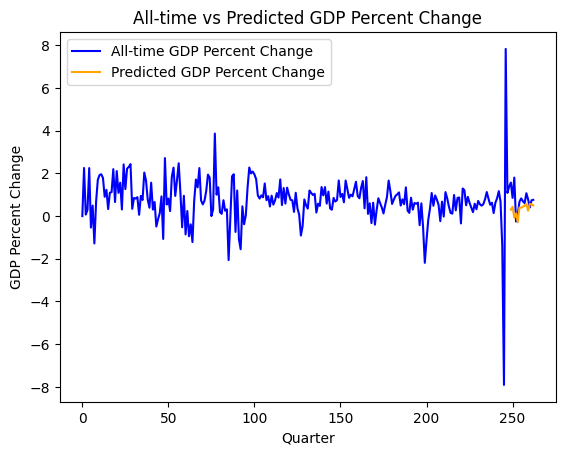

In [22]:
import pylab as plt
# Plotting both the all-time and predicted GDP percent changes
gdp_all_time = quarterly_data['GDP_percent_change']
plt.plot(gdp_all_time, label="All-time GDP Percent Change", color='blue')
plt.plot(gdp_all_time.index[-len(y_pred):], y_pred, label="Predicted GDP Percent Change", color='orange')

# Adding labels and legend
plt.xlabel('Quarter')
plt.ylabel('GDP Percent Change')
plt.title('All-time vs Predicted GDP Percent Change')
plt.legend()
plt.show()


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define LSTM model
model = Sequential([
    LSTM(60, activation="relu", return_sequences=True, input_shape=(seq_length, len(xgb_features))),
    Dropout(0.2),
    LSTM(120, activation="relu", return_sequences=False),
    Dropout(0.2),
    Dense(20),
    Dense(1)  # Output is a single numerical value (GDP percent change)
])


model.compile(optimizer="adam", loss="mse", metrics=["mae"])

model.fit(Xgb_train, ygb_train, epochs=50, batch_size=8, validation_data=(Xgb_test, ygb_test))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 4661.5664 - mae: 55.0585 - val_loss: 4177.1421 - val_mae: 64.3001
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2924.4609 - mae: 39.7080 - val_loss: 7.3685 - val_mae: 2.2785
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1487.1831 - mae: 30.9995 - val_loss: 518.7777 - val_mae: 22.7628
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1164.2634 - mae: 27.4068 - val_loss: 15.9206 - val_mae: 3.9591
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 637.3306 - mae: 19.0673 - val_loss: 7.6031 - val_mae: 2.7073
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 332.7426 - mae: 14.2567 - val_loss: 5.9856 - val_mae: 2.3952
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 258.1106 - mae: 12.3907 - val_loss: 31.8570 - val_mae: 5.6206
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 131.0981 - mae: 9.4422 - val_loss: 2.2144 - val_mae: 1.3951
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0

In [24]:
ygb_pred = model.predict(Xgb_test)

# Calculate RMSE
rmse_seq = np.sqrt(mean_squared_error(ygb_test, ygb_pred))
print(f"LSTM Regression RMSE: {rmse_seq:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
LSTM Regression RMSE: 0.6842


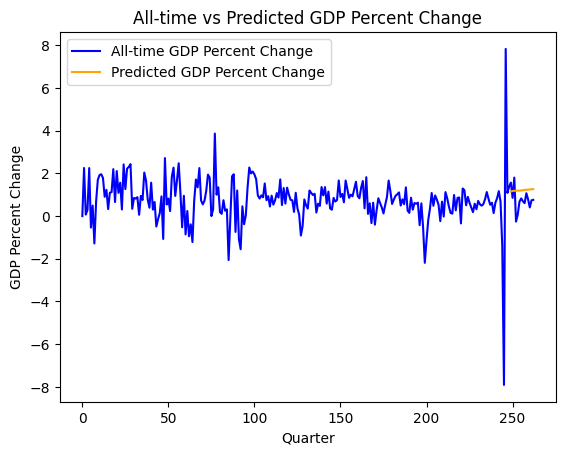

In [25]:
import pylab as plt
# Plotting both the all-time and predicted GDP percent changes
gdp_all_time = quarterly_data['GDP_percent_change']
plt.plot(gdp_all_time, label="All-time GDP Percent Change", color='blue')
plt.plot(gdp_all_time.index[-len(ygb_pred):], ygb_pred, label="Predicted GDP Percent Change", color='orange')

# Adding labels and legend
plt.xlabel('Quarter')
plt.ylabel('GDP Percent Change')
plt.title('All-time vs Predicted GDP Percent Change')
plt.legend()
plt.show()

In [26]:
quarterly_data['consumption_change'] = quarterly_data['PCECC96'].pct_change() * 100

In [27]:
quarterly_data.dropna(inplace=True)

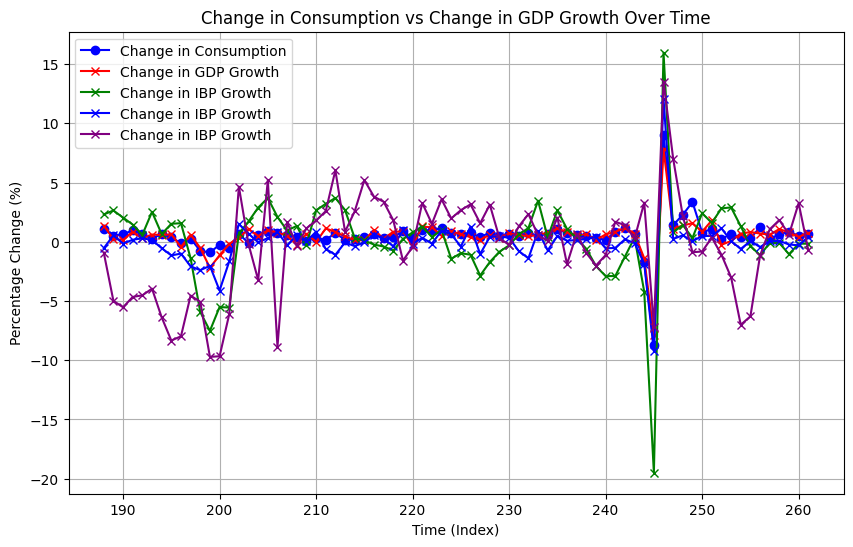

In [28]:
import matplotlib.pyplot as plt

# Plot change in consumption vs change in GDP growth
plt.figure(figsize=(10, 6))

# Plot the change in consumption
plt.plot(quarterly_data.index, quarterly_data['consumption_change'], label='Change in Consumption', color='blue', linestyle='-', marker='o')

# Plot the change in GDP growth
plt.plot(quarterly_data.index, quarterly_data['GDP_percent_change'], label='Change in GDP Growth', color='red', linestyle='-', marker='x')
plt.plot(quarterly_data.index, quarterly_data['IPBUSEQ_percent_change'], label='Change in IBP Growth', color='green', linestyle='-', marker='x')
plt.plot(quarterly_data.index, quarterly_data['IPCONGD_percent_change'], label='Change in IBP Growth', color='blue', linestyle='-', marker='x')
plt.plot(quarterly_data.index, quarterly_data['PRFIx_percent_change'], label='Change in IBP Growth', color='purple', linestyle='-', marker='x')

# Add labels and title
plt.title('Change in Consumption vs Change in GDP Growth Over Time')
plt.xlabel('Time (Index)')
plt.ylabel('Percentage Change (%)')

# Show legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


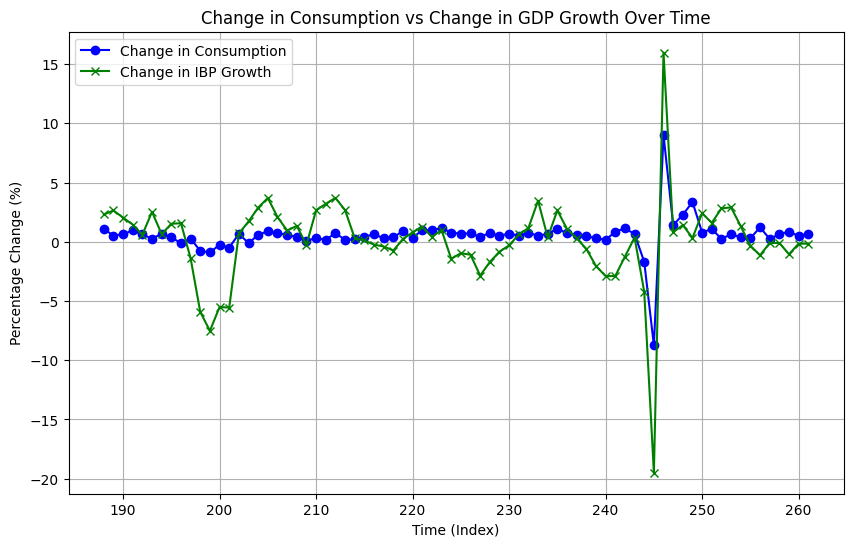

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(quarterly_data.index, quarterly_data['consumption_change'], label='Change in Consumption', color='blue', linestyle='-', marker='o')

plt.plot(quarterly_data.index, quarterly_data['IPBUSEQ_percent_change'], label='Change in IBP Growth', color='green', linestyle='-', marker='x')

plt.title('Change in Consumption vs Change in GDP Growth Over Time')
plt.xlabel('Time (Index)')
plt.ylabel('Percentage Change (%)')

plt.legend()

plt.grid(True)
plt.show()

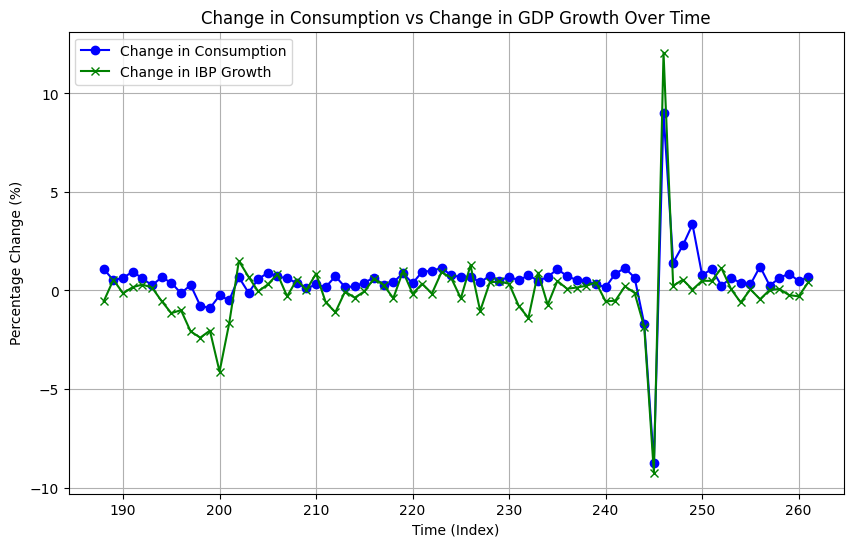

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(quarterly_data.index, quarterly_data['consumption_change'], label='Change in Consumption', color='blue', linestyle='-', marker='o')

plt.plot(quarterly_data.index, quarterly_data['IPCONGD_percent_change'], label='Change in IBP Growth', color='green', linestyle='-', marker='x')

plt.title('Change in Consumption vs Change in GDP Growth Over Time')
plt.xlabel('Time (Index)')
plt.ylabel('Percentage Change (%)')

plt.legend()

plt.grid(True)
plt.show()

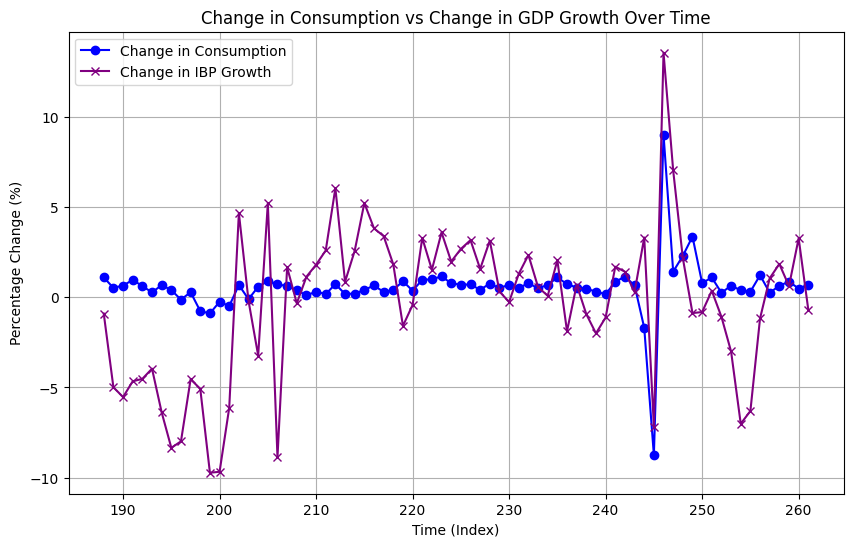

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(quarterly_data.index, quarterly_data['consumption_change'], label='Change in Consumption', color='blue', linestyle='-', marker='o')

plt.plot(quarterly_data.index, quarterly_data['PRFIx_percent_change'], label='Change in IBP Growth', color='purple', linestyle='-', marker='x')

plt.title('Change in Consumption vs Change in GDP Growth Over Time')
plt.xlabel('Time (Index)')
plt.ylabel('Percentage Change (%)')

plt.legend()

plt.grid(True)
plt.show()